# Imports

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.preprocessing import StandardScaler

# Data

In [2]:
face = "https://storage.googleapis.com/edulabs-public-datasets/synthetic/face.csv"

In [4]:
face_df = pd.read_csv(face)

In [5]:
fig = px.scatter(face_df, x= 'x', y='y', color="color")
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.show()

In [7]:
# Extract features for clustering
X = face_df[['x', 'y']]

# Scale the data

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# K-Means on face dataset

# Apply DBSCAN

In [30]:
dbscan = DBSCAN(eps=2.0, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

In [31]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
#  Add cluster labels to DataFrame
X_scaled['Cluster'] = labels.astype(str)

In [33]:
# label noise as "Noise"
X_scaled.loc[X_scaled['Cluster'] == '-1', 'Cluster'] = 'Noise'

In [34]:
# Plot with Plotly
fig = px.scatter(
    X_scaled,
    x='x',
    y='y',
    color='Cluster',
    title="DBSCAN Clustering on Face Points",
    color_discrete_sequence=px.colors.qualitative.Set1,
    width=600, height=600
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)  # keep aspect ratio
fig.show()

# Tweak parmeters

## k-distance graph

It's a plot of the distance to the k-th nearest neighbor for each point in the dataset, sorted in ascending order. The “elbow” point on the graph indicates a good value for eps.


At each point on the curve, the y-value shows the distance to the k-th nearest neighbor for the i-th point (sorted). So for a given y, we can say that i points in the dataset have a k-th nearest distance less than or equal to y.

**Why it works**
- Points in dense clusters will have small k-distances.
- Points in sparse areas (potential outliers) will have larger k-distances.
- The "elbow" marks the transition from dense to sparse → a good eps.


**Tips:**
- Try different k values (between 4–10).
- Use min_samples = dimensionality + 1 as a rule of thumb.
- If your data is noisy or very dense, the elbow might not be sharp — experiment manually with a few eps values.

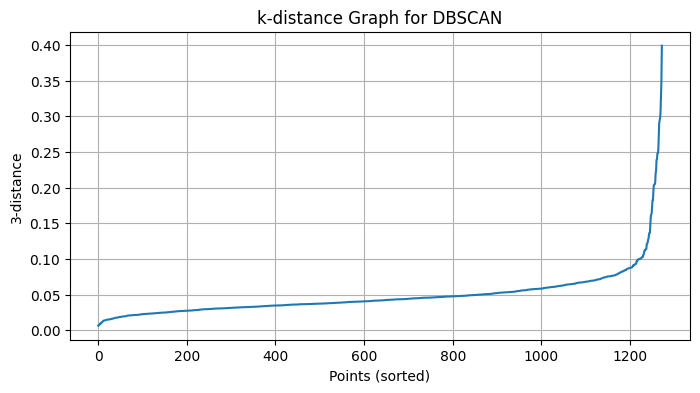

In [44]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

X_scaled = X_scaled[['x', 'y']]

# Choose k = min_samples (often 4 to 10)
k = 3
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Sort the k-th nearest distances (i.e., distances[:, k-1])
k_distances = np.sort(distances[:, k-1])

# Plot the k-distance graph
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.xlabel("Points (sorted)")
plt.ylabel(f"{k}-distance")
plt.title("k-distance Graph for DBSCAN")
plt.grid(True)
plt.show()


In [52]:
X_scaled = X_scaled[['x', 'y']]

In [53]:
epsilon = 0.1
min_samples = 3

In [54]:
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(X_scaled)

In [55]:
#  Add cluster labels to DataFrame
X_scaled['Cluster'] = labels.astype(str)

In [56]:
# label noise as "Noise"
X_scaled.loc[X_scaled['Cluster'] == '-1', 'Cluster'] = 'Noise'

In [ ]:
# Plot with Plotly
fig = px.scatter(
    X_scaled,
    x='x',
    y='y',
    color='Cluster',
    title="DBSCAN Clustering on Face Points",
    color_discrete_sequence=px.colors.qualitative.Set1,
    width=600, height=600
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)  # keep aspect ratio
fig.show()

# Check metrics

In [62]:
labels

array([0, 1, 2, ..., 3, 1, 1])

In [63]:
print("Adjusted Rand Index (ARI):", adjusted_rand_score(face_df['color'], labels))

Adjusted Rand Index (ARI): 0.9658292530565108


In [64]:
print("Mutual Information Index (MI):", adjusted_mutual_info_score(face_df['color'], labels))

Mutual Information Index (MI): 0.9619853606746368
